# Import Library

Using the same dataset with the LinearRegression from previous repository, in this case we will learn how is the effect of PCA (Principal Component Analysis) to Regression Machine Learning Model. 

In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor




In [223]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Import Dataset

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town.\
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per $10,000\
PTRATIO - pupil-teacher ratio by town\
BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT - % lower status of the population\
MEDV - Median value of owner-occupied homes in $1000's

In [224]:
boston = pd.read_csv('boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

In [225]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [226]:
boston.duplicated().any()

False

No missing value and duplicate data found in the dataset.

In [227]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [228]:
for col in boston.columns:
    print(f'Percentage of unique number in {col} :')
    print(round(boston[col].value_counts(normalize = True)*100,2))
    print()

Percentage of unique number in crim :
crim
0.01501     0.4
14.33370    0.4
0.03466     0.2
0.03113     0.2
0.03049     0.2
           ... 
1.51902     0.2
1.83377     0.2
1.46336     0.2
1.27346     0.2
0.04741     0.2
Name: proportion, Length: 504, dtype: float64

Percentage of unique number in zn :
zn
0.0      73.52
20.0      4.15
80.0      2.96
22.0      1.98
12.5      1.98
25.0      1.98
40.0      1.38
45.0      1.19
30.0      1.19
90.0      0.99
95.0      0.79
60.0      0.79
21.0      0.79
33.0      0.79
55.0      0.59
70.0      0.59
34.0      0.59
52.5      0.59
35.0      0.59
28.0      0.59
75.0      0.59
82.5      0.40
85.0      0.40
17.5      0.20
100.0     0.20
18.0      0.20
Name: proportion, dtype: float64

Percentage of unique number in indus :
indus
18.10    26.09
19.58     5.93
8.14      4.35
6.20      3.56
21.89     2.96
         ...  
1.21      0.20
1.38      0.20
3.75      0.20
0.46      0.20
2.31      0.20
Name: proportion, Length: 76, dtype: float64

Percentage of u

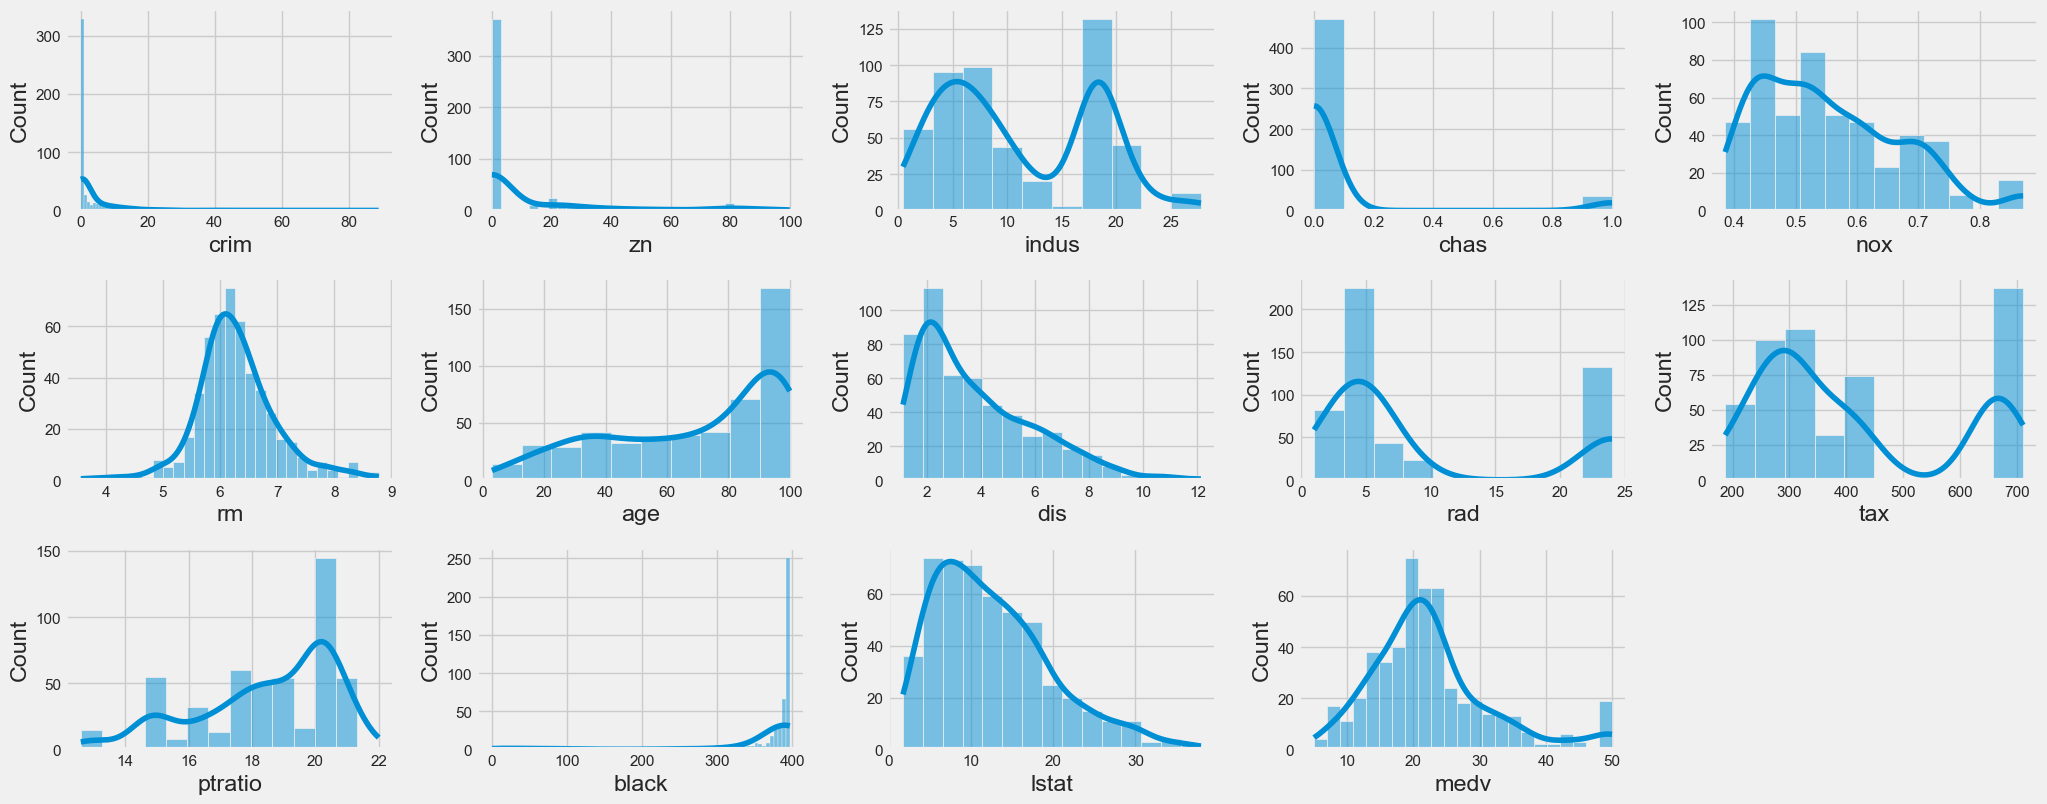

In [229]:
for i in range(0, len(boston.columns)):
    plt.subplot(3, 5, i+1)
    sns.histplot(x=boston[boston.columns[i]], kde=True)
    plt.tight_layout()

There will be no outlier handling, since the dataset is limited in number. Outliers will be handled using StandardScaler. 

# Data Train Test Split

In [230]:
feature = boston.drop(columns='medv')
target = boston[['medv']]

# split between data train and data test
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20, random_state=42)


# Multicollinearity Check using Variance Inflation Factor (VIF) and Heatmap Correlation

In [231]:
X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()

vif_df.columns = ['feature','vif_score']

vif_df = vif_df.loc[vif_df.feature!='const']

vif_df

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are 4 features with moderate multi-collinearity (4-10): 
- nox (4.585650)
- dis (4.390458)
- rad (7.182410)
- tax (8.268145)

The detailed correlation will be analyzed by using heatmap correlation.

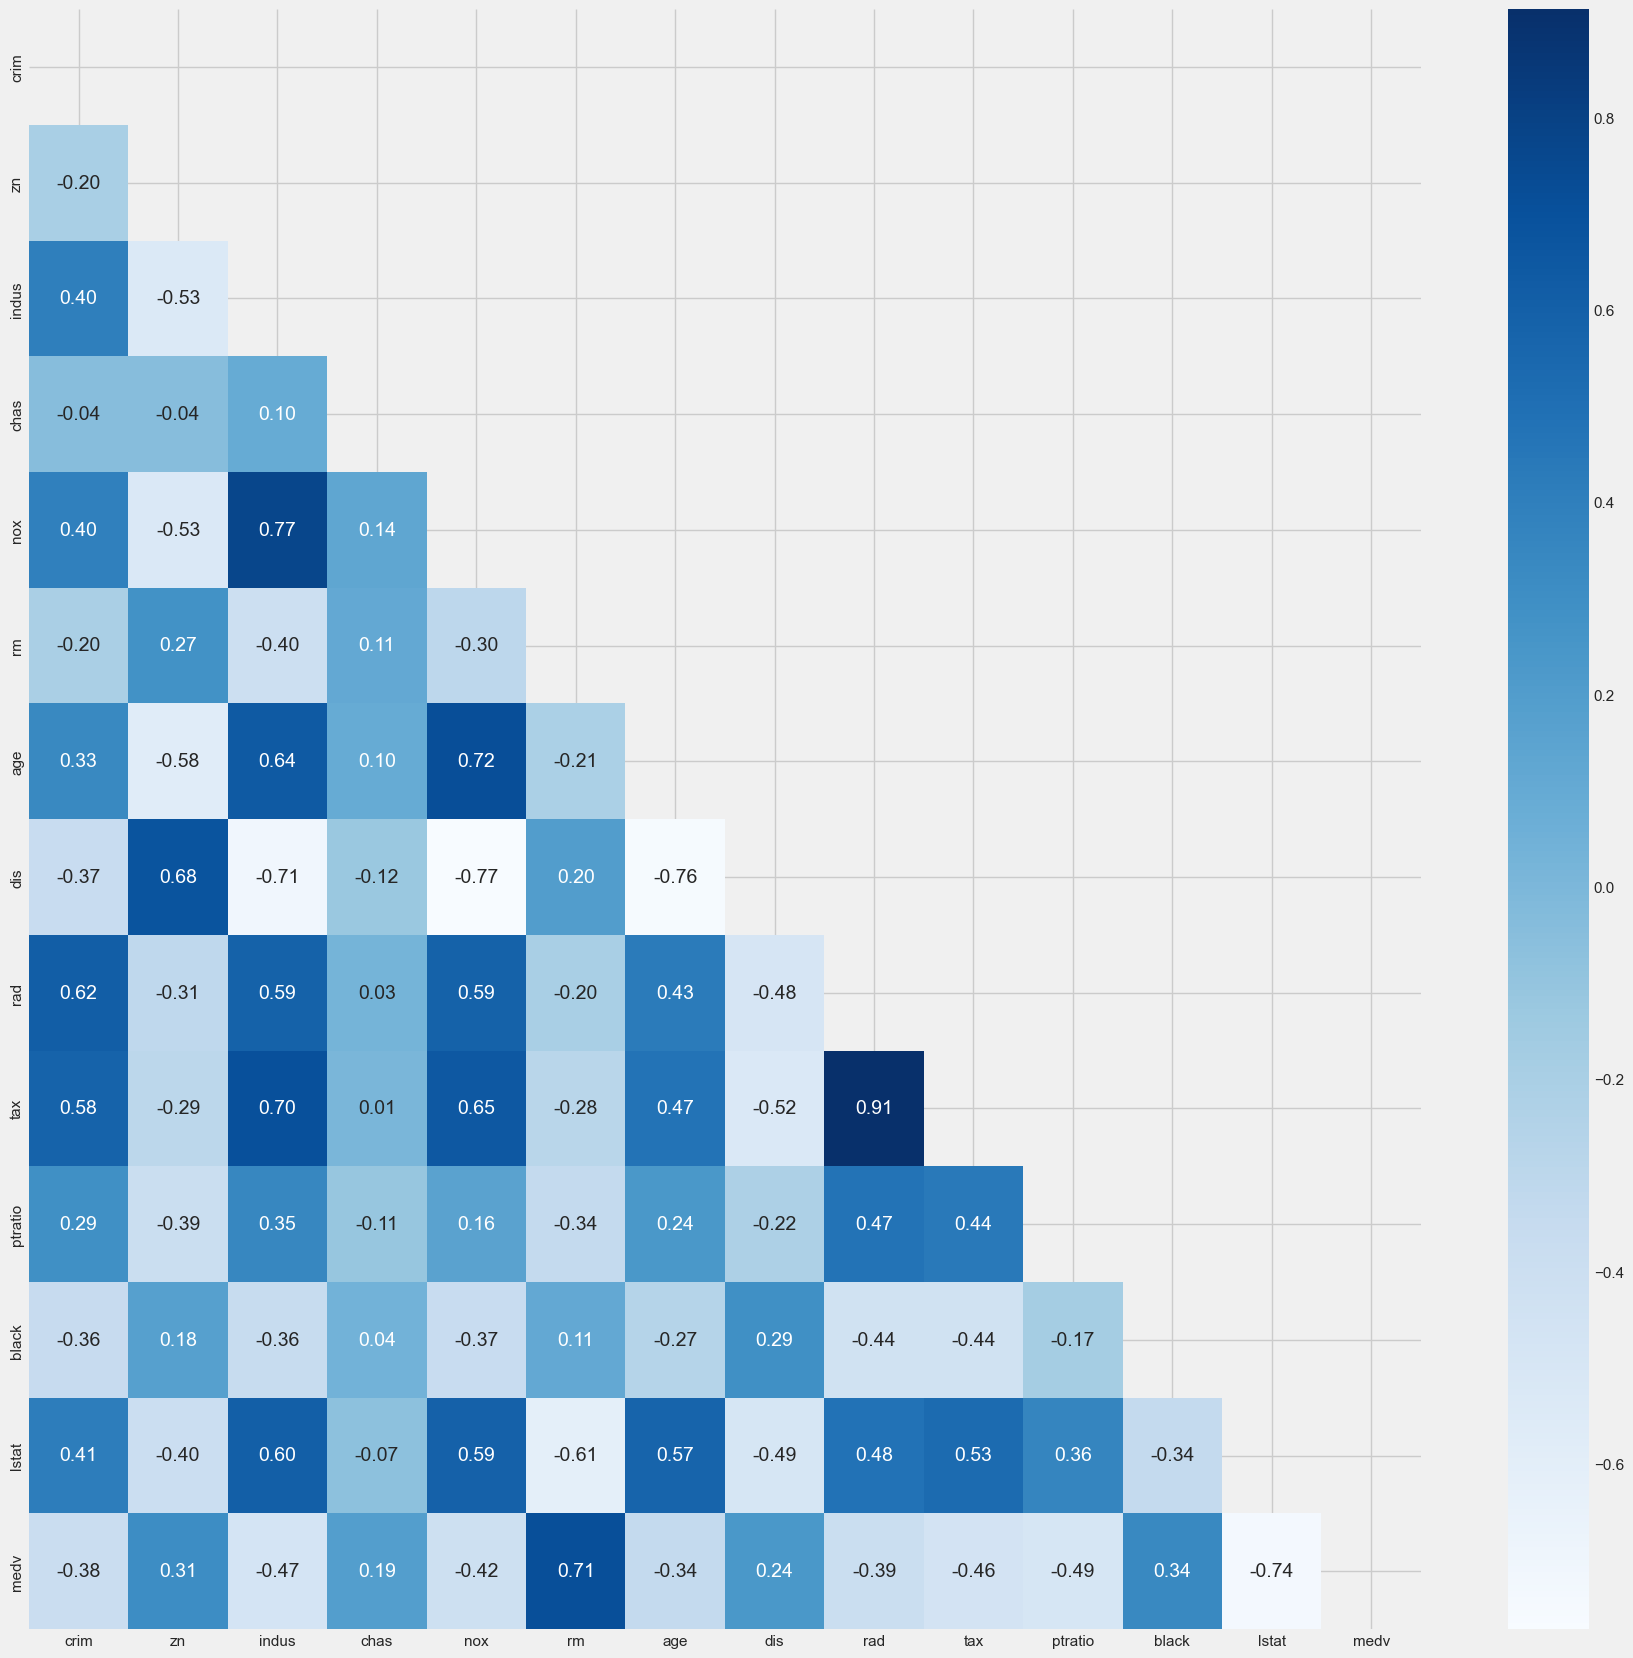

In [232]:
# heatmap correlation
boston_train = pd.concat([X_train, y_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(20,20))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot=True, fmt='.2f', mask = mask)
plt.show()

- Based on correlation heatmap, it is aligned with VIF score, that nox, dis, rad, and tax have high correlation with other features with correlation >0.7. 
- Age and indus also have high correlation with other features. Hence, nox, dis, age, tax, and rad will not be used further for modeling. 
- Indus will be used for further since it has the highest correlation with target (medv) compared to features that have high correlation. 

In [233]:
X_train = X_train.drop(columns=['nox', 'dis', 'rad', 'age', 'tax'])
X_test = X_test.drop(columns=['nox', 'dis', 'rad', 'age', 'tax'])

Recheck multicollinearity after feature selection

In [234]:
X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.365169
2,zn,1.516227
3,indus,2.093778
4,chas,1.067192
5,rm,1.707473
6,ptratio,1.344551
7,black,1.268572
8,lstat,2.350044


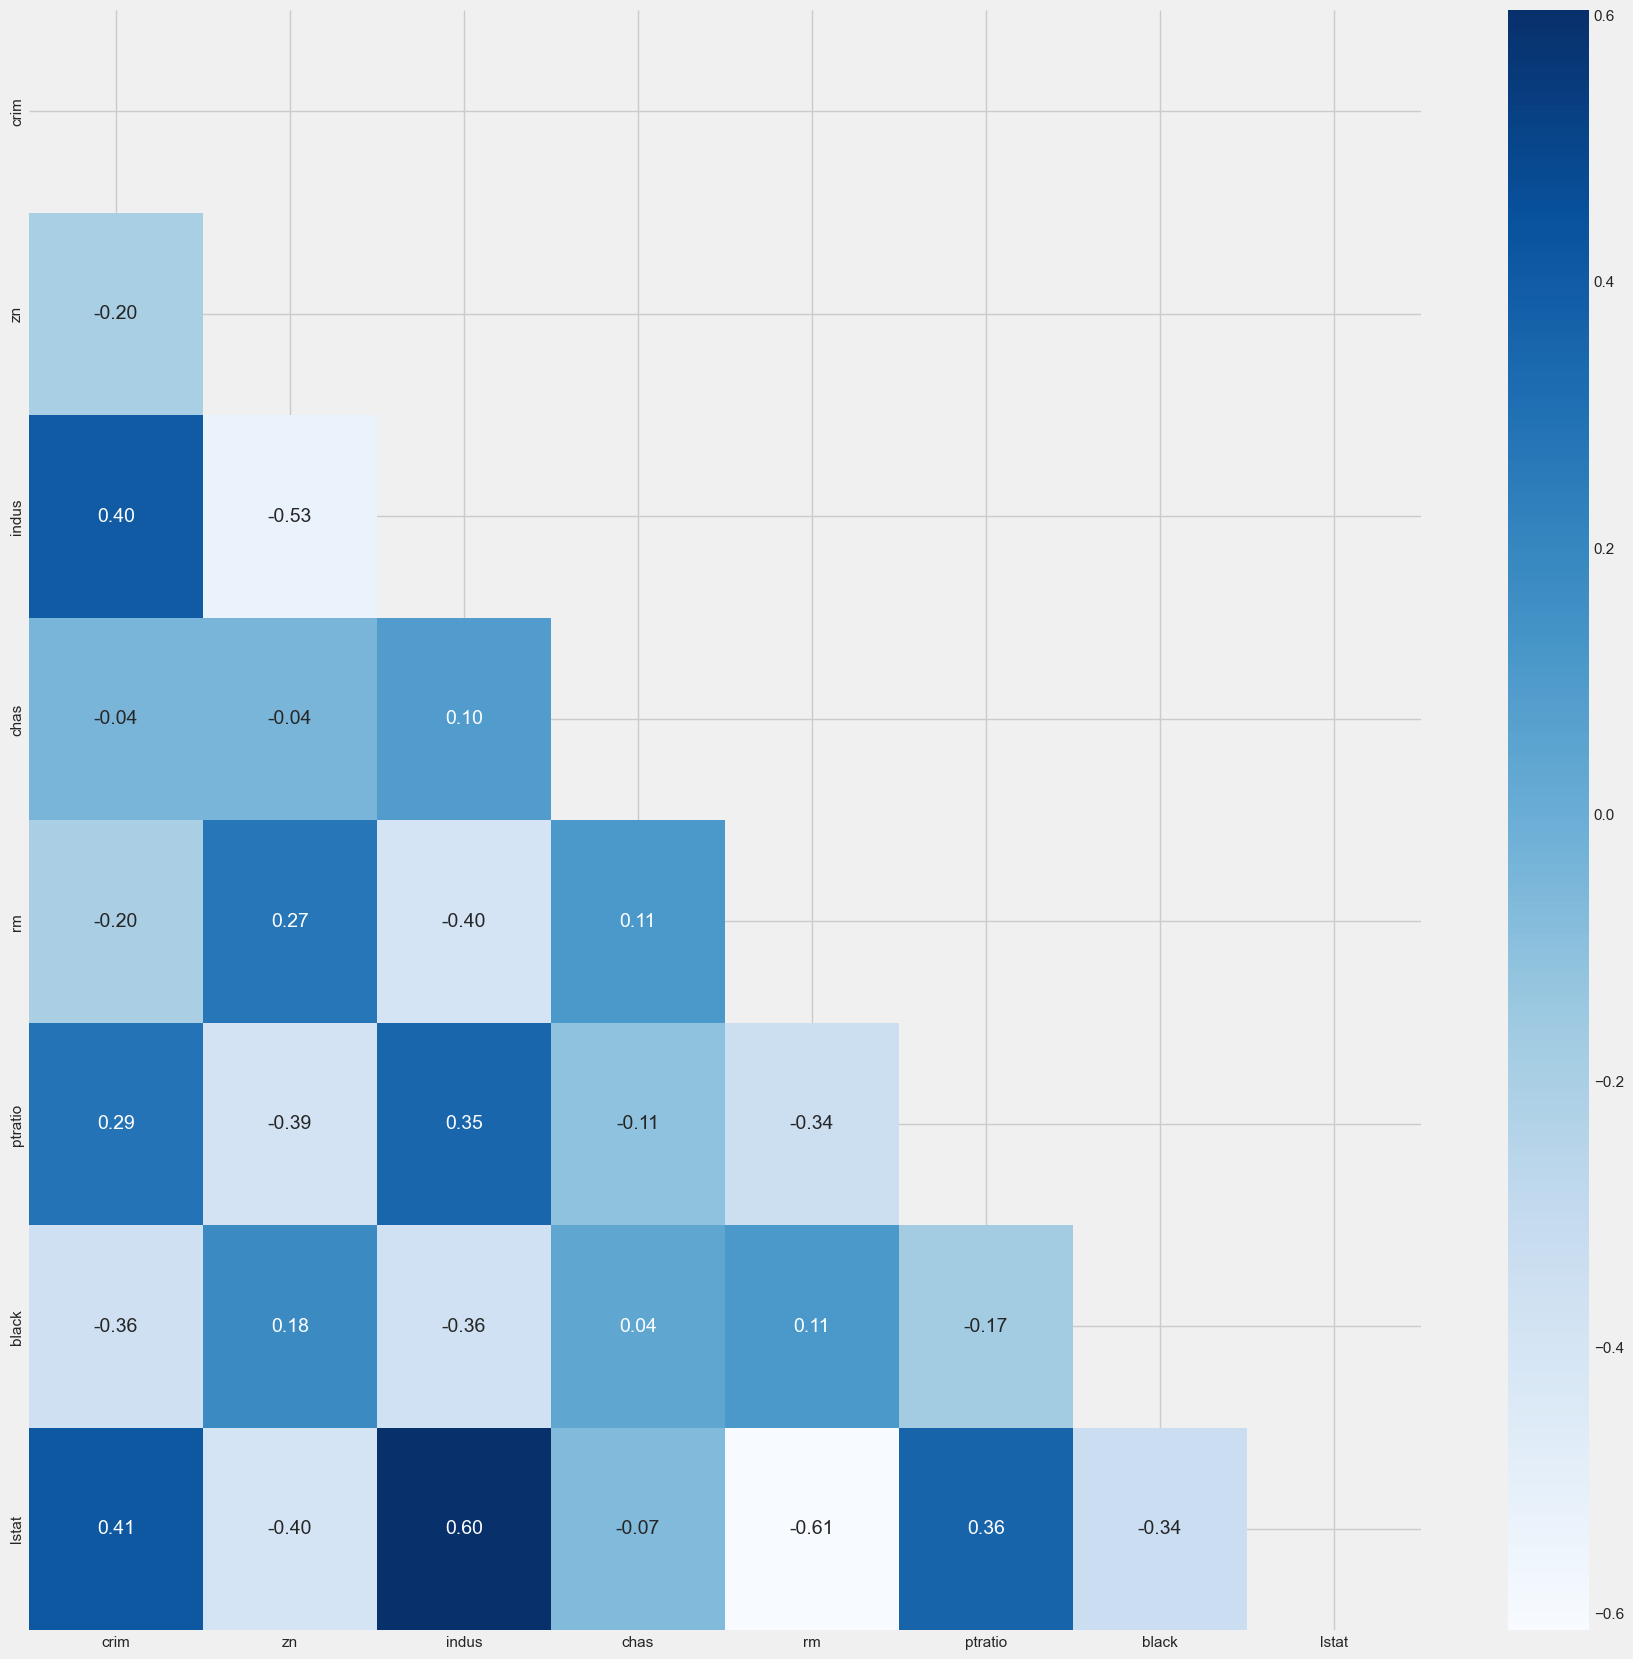

In [235]:
corr = X_train.corr()
plt.figure(figsize=(20,20))

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, cmap = 'Blues', annot=True, fmt='.2f', mask = mask)
plt.show()

- After performing recheck for VIF score and heatmap correlation, the dataset is no longer have features that have high multicollinearity.
- Feature indus and rm have high correlation with the target medv.

## Data Scaling for PCA

Data scaling for PCA is important, because the algorithm will calculate distance among data points. Unbalanced scale of features may lead to a mistake in model building. 

In [236]:
scaler = StandardScaler()

X = X_train.copy()
scaler.fit(X) 
X_std = scaler.transform(X) 

In [237]:
X_train = pd.DataFrame(X_std, columns = X_train.columns)
X_train.describe()

,crim,zn,indus,chas,rm,ptratio,black,lstat
count,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-2.638154e-17,0.000000,-4.177077e-17,1.319077e-17,-2.616169e-16,8.519038e-16,-4.946538e-16,-1.791746e-16
std,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-0.500320,-1.487791e+00,-2.780887e-01,-3.461733e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-0.500320,-8.502733e-01,-2.780887e-01,-6.003488e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-0.500320,-3.521669e-01,-2.780887e-01,-1.494427e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,0.364589,1.033237e+00,-2.780887e-01,4.528240e-01,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227,2.433163e+00,3.595975e+00,3.477564e+00,1.653990e+00,4.441800e-01,3.592534e+00


# PCA using 8 features

The algorithm will transform features in dataset to pc, with exactly the same number as the original features in the dataset. 

In [238]:
pca = PCA(n_components=8)
pca.fit(X_std)
pcs = pca.transform(X_std)

pdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])
pdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,2.743502,-0.532934,-0.215480,0.659123,0.655475,0.331713,-0.038543,-0.234169
1,0.171588,-0.734130,-0.963188,-0.821235,0.352399,-0.590854,0.418896,0.454340
2,-1.209575,-0.589847,0.215421,0.737824,-0.008291,-0.337484,0.184400,0.474280
3,2.999562,0.362430,2.233175,-0.070074,-1.568998,-1.704169,0.088092,-0.382270
4,0.429534,-0.803342,-0.996183,-0.593234,0.326669,-0.625721,0.443809,0.219385


- For dimensionality reduction, Scree plot will be used to represent variances that each pc has. 
- We will use features that cover 90% variance from the dataset. 

In [239]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_*100)

Explained variance: [3.15924383 1.10300237 1.02888032 0.80168702 0.67758919 0.5798001
 0.36962985 0.30001844]
Explained variance ratio: [39.39279895 13.75340213 12.8291698   9.99628311  8.44889984  7.22956192
  4.6089365   3.74094773]


## Scree Plot

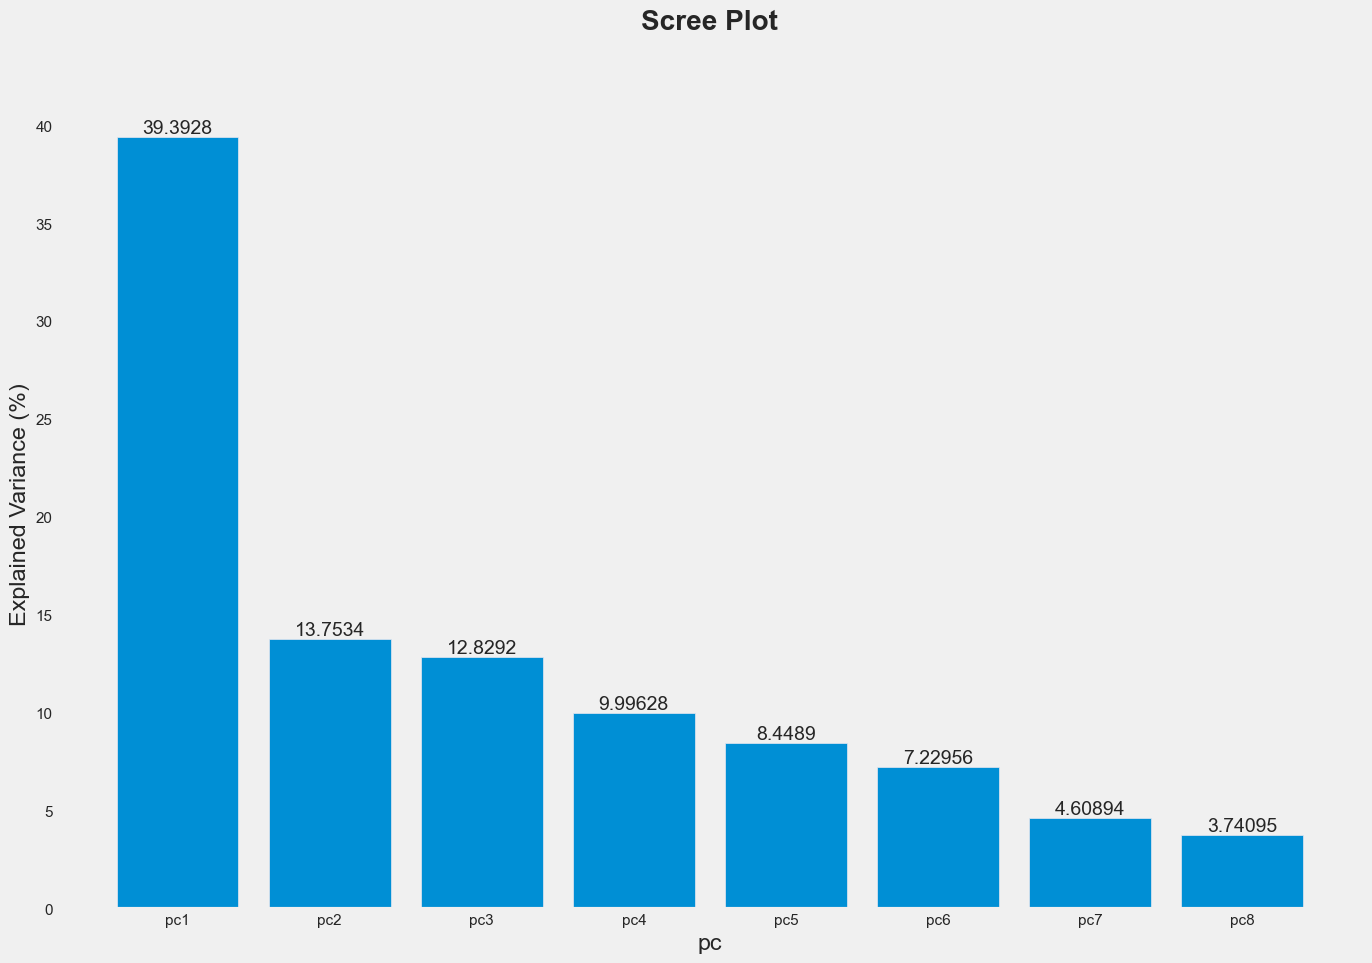

In [240]:
fig, ax = plt.subplots(figsize=(15,10))
explained_variance_ratio = pca.explained_variance_ratio_*100
plt.bar(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'], explained_variance_ratio, color='blue')
bars = ax.bar(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'], explained_variance_ratio)
ax.bar_label(bars)
plt.grid(visible=False)
plt.xlabel('pc')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot', loc='center', pad=50, fontweight='bold')
plt.show()

In [241]:
pca.explained_variance_ratio_[0:6]*100

array([39.39279895, 13.75340213, 12.8291698 ,  9.99628311,  8.44889984,
        7.22956192])

In [242]:
pca.explained_variance_ratio_[0:6].sum()*100

91.65011576410531

Since pc1 to pc6 already cover more than 90% variance, we will use 6 pcs as features for modelling. 

## Train dataset to PCA using 6 pcs

In [243]:
pca = PCA(n_components=6)
pca.fit(X_std)
pcs = pca.transform(X_std)

X_std_pca = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
X_std_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6
0,2.743502,-0.532934,-0.215480,0.659123,0.655475,0.331713
1,0.171588,-0.734130,-0.963188,-0.821235,0.352399,-0.590854
2,-1.209575,-0.589847,0.215421,0.737824,-0.008291,-0.337484
3,2.999562,0.362430,2.233175,-0.070074,-1.568998,-1.704169
4,0.429534,-0.803342,-0.996183,-0.593234,0.326669,-0.625721


# Modelling Dataset using Linear Regression and Random Forest

Model Testing using Evaluation Metric: 
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)
- Root Mean Squared Error (RMSE)

Train Test Data Split for learning the effect of PCA to supervised learning model evaluation metrics. 

In [244]:
X_train_without_pca, X_test_without_pca, y_train_without_pca, y_test_without_pca = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_std_pca, y_train, test_size = 0.2, random_state=42)

In [245]:
y_train_without_pca = y_train_without_pca.to_numpy()
y_train_without_pca = y_train_without_pca.reshape(len(y_train_without_pca),)

y_train_pca = y_train_pca.to_numpy()
y_train_pca = y_train_pca.reshape(len(y_train_pca),)

## PCA Effect Learning in Linear Regression

In [246]:
# training model without PCA

linreg = LinearRegression()
linreg = linreg.fit(X_train_without_pca, y_train_without_pca)

# prediction based on data test

y_pred_without_pca = linreg.predict(X_test_without_pca)


In [247]:
print('RMSE for testing data without PCA is {}'.format(np.sqrt(mean_squared_error(y_test_without_pca, y_pred_without_pca))))
print('MAE for testing data without PCA is {}'.format(mean_absolute_error(y_test_without_pca, y_pred_without_pca)))
print('MAPE for testing data without PCA is {}'.format(mean_absolute_percentage_error(y_test_without_pca, y_pred_without_pca)))

RMSE for testing data without PCA is 5.087774216727248
MAE for testing data without PCA is 3.13018351950225
MAPE for testing data without PCA is 0.16122614158921414


In [248]:
# training model with PCA

linreg_pca = LinearRegression()
linreg_pca.fit(X_train_pca, y_train_pca)

# prediction based on data test
y_pred_pca = linreg_pca.predict(X_test_pca)

In [249]:
print('RMSE for testing data with PCA is {}'.format(np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))))
print('MAE for testing data with PCA is {}'.format(mean_absolute_error(y_test_pca, y_pred_pca)))
print('MAPE for testing data with PCA is {}'.format(mean_absolute_percentage_error(y_test_pca, y_pred_pca)))

RMSE for testing data with PCA is 5.109516442325734
MAE for testing data with PCA is 3.1261873029859117
MAPE for testing data with PCA is 0.16236733972032272


In [250]:
new_linreg= pd.DataFrame({'Without PCA': [np.sqrt(mean_squared_error(y_test_without_pca, y_pred_without_pca)),
                              mean_absolute_error(y_test_without_pca, y_pred_without_pca),
                              mean_absolute_percentage_error(y_test_without_pca, y_pred_without_pca)],
                'With PCA': [np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)),
                              mean_absolute_error(y_test_pca, y_pred_pca),
                              mean_absolute_percentage_error(y_test_pca, y_pred_pca)]}, index= ['RMSE', 'MAE', 'MAPE'])

new_linreg

,Without PCA,With PCA
RMSE,5.087774,5.109516
MAE,3.130184,3.126187
MAPE,0.161226,0.162367


In Linear Regression, using PCA will slightly increase RMSE and MAPE, and slightly decrease MAE. In this case, using PCA have almost no impact for model performance, but it technically reduce model performance.

In [251]:
rf = RandomForestRegressor(random_state=42)
rf = rf.fit(X_train_without_pca, y_train_without_pca)

# prediction based on data test
y_pred_without_pca = rf.predict(X_test_without_pca)


In [252]:
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)

# prediction based on data test
y_pred_pca = rf_pca.predict(X_test_pca)


In [253]:
print('RMSE for testing data without PCA is {}'.format(np.sqrt(mean_squared_error(y_test_without_pca, y_pred_without_pca))))
print('MAE for testing data without PCA is {}'.format(mean_absolute_error(y_test_without_pca, y_pred_without_pca)))
print('MAPE for testing data without PCA is {}'.format(mean_absolute_percentage_error(y_test_without_pca, y_pred_without_pca)))

RMSE for testing data without PCA is 4.4048866186834825
MAE for testing data without PCA is 2.7989876543209875
MAPE for testing data without PCA is 0.14932232216743294


In [254]:
print('RMSE for testing data with PCA is {}'.format(np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))))
print('MAE for testing data with PCA is {}'.format(mean_absolute_error(y_test_pca, y_pred_pca)))
print('MAPE for testing data with PCA is {}'.format(mean_absolute_percentage_error(y_test_pca, y_pred_pca)))

RMSE for testing data with PCA is 4.8170422754996265
MAE for testing data with PCA is 2.96537037037037
MAPE for testing data with PCA is 0.147793199554066


In [255]:
new_rf= pd.DataFrame({'Without PCA': [np.sqrt(mean_squared_error(y_test_without_pca, y_pred_without_pca)),
                              mean_absolute_error(y_test_without_pca, y_pred_without_pca),
                              mean_absolute_percentage_error(y_test_without_pca, y_pred_without_pca)],
                'With PCA': [np.sqrt(mean_squared_error(y_test_pca, y_pred_pca)),
                              mean_absolute_error(y_test_pca, y_pred_pca),
                              mean_absolute_percentage_error(y_test_pca, y_pred_pca)]}, index= ['RMSE', 'MAE', 'MAPE'])

new_rf

,Without PCA,With PCA
RMSE,4.404887,4.817042
MAE,2.798988,2.965370
MAPE,0.149322,0.147793


- Compared to Linear Regression, using PCA in Random Forest Regression have more impact. 
- The use of PCA increase the value of RMSE and MAE, whereas the value of MAPE is slightly decreased. 
- This phenomenon indicated that the use of PCA in this dataset will generally make the model performance worse. 
- This can be happened because the dataset have small number, hence using PCA tend to remove important information rather than noise in the features. 